In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_train[0].shape

(32, 32, 3)

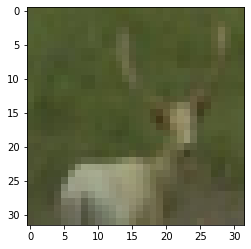

In [13]:
plt.imshow(x_train[180])

In [18]:
x_train.max()

1.1333333333333333

In [15]:
x_train = x_train/225

In [16]:
x_test = x_test/255

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_test.shape

(10000, 32, 32, 3)

In [22]:
y_cat_train = to_categorical(y_train,10)

In [24]:
y_cat_train[180]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
y_cat_test = to_categorical(y_test,10)

Train the model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [31]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 20s 10ms/step - loss: 1.5187 - accuracy: 0.4560 - val_loss: 1.2337 - val_accuracy: 0.5628
Epoch 2/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1689 - accuracy: 0.5871 - val_loss: 1.5228 - val_accuracy: 0.4628
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0135 - accuracy: 0.6457 - val_loss: 1.0306 - val_accuracy: 0.6321
Epoch 4/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9075 - accuracy: 0.6847 - val_loss: 1.0627 - val_accuracy: 0.6408
Epoch 5/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8260 - accuracy: 0.7174 - val_loss: 1.0976 - val_accuracy: 0.6433
Epoch 6/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7597 - accuracy: 0.7389 - val_loss: 1.0830 - val_accuracy: 0.6472


Evaluate the model

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.518716,0.45602,1.233657,0.5628
1,1.168943,0.58710,1.522810,0.4628
2,1.013469,0.64566,1.030612,0.6321
3,0.907487,0.68466,1.062729,0.6408
4,0.826039,0.71744,1.097561,0.6433


<AxesSubplot:>

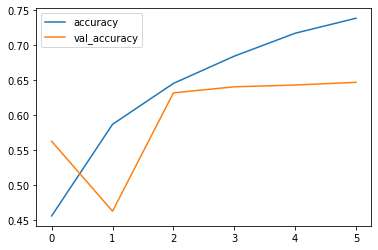

In [36]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

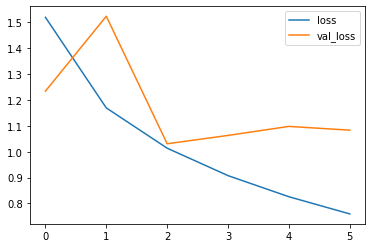

In [37]:
losses[['loss','val_loss']].plot()

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.083005666732788, 0.6471999883651733]


In [40]:
pred=model.predict(x_test)
pred=np.argmax(pred,axis=1)

313/313 [==============================] - 1s 2ms/step


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1000
           1       0.89      0.68      0.77      1000
           2       0.84      0.26      0.40      1000
           3       0.47      0.49      0.48      1000
           4       0.51      0.73      0.60      1000
           5       0.60      0.51      0.55      1000
           6       0.71      0.76      0.73      1000
           7       0.55      0.82      0.66      1000
           8       0.78      0.78      0.78      1000
           9       0.64      0.83      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.64     10000
weighted avg       0.68      0.65      0.64     10000



In [42]:
confusion_matrix(y_test,pred)

array([[615,  18,  15,  37,  59,   9,  25,  42,  99,  81],
       [  5, 678,   1,  14,  13,  10,  15,  18,  33, 213],
       [ 59,   6, 262, 114, 210,  81, 104, 129,  17,  18],
       [  8,  10,   7, 489, 121, 150,  56, 106,  16,  37],
       [ 10,   0,  10,  47, 727,  21,  40, 127,  10,   8],
       [  4,   2,   3, 167,  87, 512,  39, 163,   7,  16],
       [  2,   0,   7,  81,  89,  25, 757,  22,   7,  10],
       [  6,   0,   3,  35,  82,  28,   3, 819,   4,  20],
       [ 47,  18,   3,  24,  22,  10,  13,  15, 784,  64],
       [  7,  33,   2,  23,  14,   5,  11,  46,  30, 829]], dtype=int64)

<AxesSubplot:>

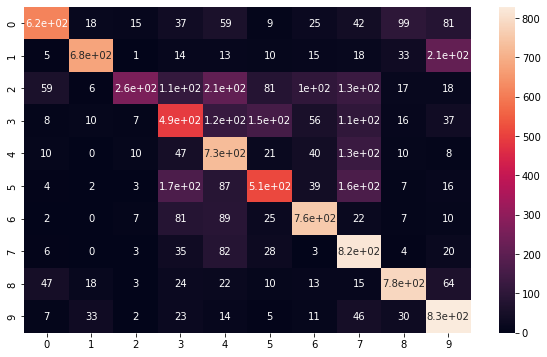

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [44]:
my_image = x_test[69]

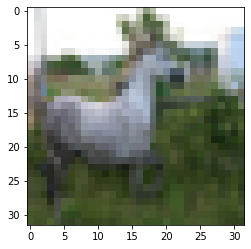

In [45]:
plt.imshow(my_image)

In [47]:
mod1=model.predict(my_image.reshape(1,32,32,3))
np.argmax(mod1,axis=1)

1/1 [==============================] - 0s 145ms/step


array([7], dtype=int64)

In [48]:
# https://www.cs.toronto.edu/~kriz/cifar.html
# horse. nice